### Import TensorFlow

In [24]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset




In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 4s 0us/step


### Verify the data

To verify that the dataset looks correct, let's plot the first 10 images from the training set and display the class name below each image:


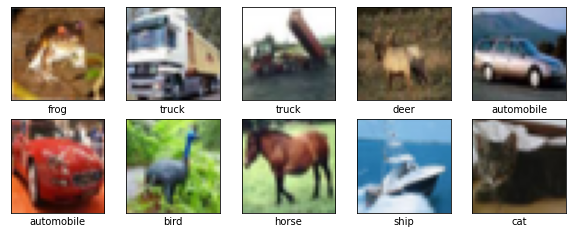

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
labels = {0:'Airplane', 1:'Automobile', 2:'Bird', 3:'Cat',
          4:'Deer', 5:'Dog',6:'Frog',
          7:'Horse', 8:'Ship', 9:'Truck'
        }

### Create the convolutional base

In [6]:
model = tf.keras.Sequential([
                             tf.keras.layers.InputLayer(input_shape=(32,32,3)),
                             tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same',strides=(1,1)),
                             tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same',strides=(2,2)),

                             tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',padding='same',strides=(1,1)),
                             tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same',strides=(2,2)),
                             tf.keras.layers.Dropout(0.25),

                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dropout(0.25),
                             tf.keras.layers.Dense(10,activation = 'softmax')
                             
])


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [9]:
model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [10]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 22s 5ms/step - loss: 1.6635 - accuracy: 0.4039 - val_loss: 1.4621 - val_accuracy: 0.5012
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2599 - accuracy: 0.5713 - val_loss: 1.0828 - val_accuracy: 0.6177
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1158 - accuracy: 0.6279 - val_loss: 1.4896 - val_accuracy: 0.5545
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0354 - accuracy: 0.6548 - val_loss: 1.0252 - val_accuracy: 0.6549
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9930 - accuracy: 0.6753 - val_loss: 0.9583 - val_accuracy: 0.6890
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9629 - accuracy: 0.6888 - val_loss: 0.9322 - val_accuracy: 0.6875
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9646 - accuracy: 0.6878 - val_loss: 0.9908 - val_accuracy: 0.6876
Ep

In [12]:
import numpy as np
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

prob = model.predict(test_images)
pred = np.argmax(prob,axis=1)

#Accuracy Score

In [16]:
print(accuracy_score(test_labels,pred))

0.7012


#Log Loss

In [17]:
print(log_loss(test_labels, prob))

0.9588782382434722


#Confusion Matrix

In [18]:
import seaborn as sns


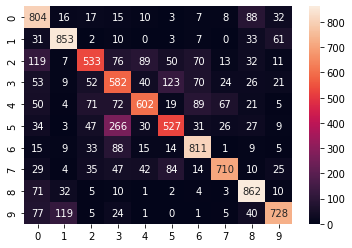

In [20]:
sns.heatmap(confusion_matrix(test_labels, pred), annot=True, fmt='g')
plt.show()

In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.3899 - accuracy: 0.5064


[1.3898972272872925, 0.5063999891281128]

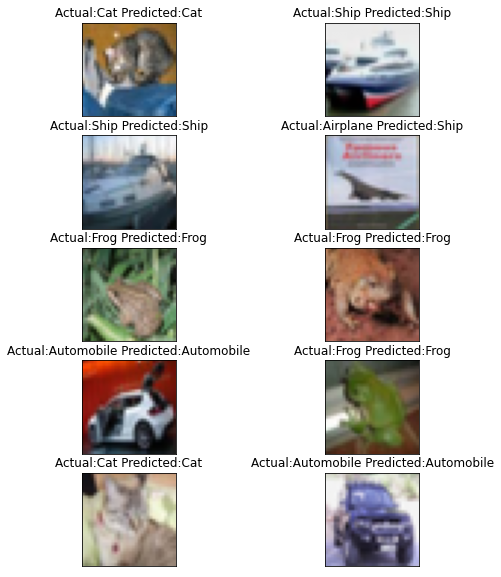

In [22]:
plt.figure(figsize=(8,10))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(test_images[i])
    string = "Actual:"+ labels[test_labels[i][0]] + " Predicted:" + labels[pred[i]] 
    plt.title(string)
    plt.xticks([])
    plt.yticks([])
    
plt.show()